In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Reading Date

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

last_new_job: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [3]:
df=pd.read_csv(r"C:\Users\nevta\HR prediction\aug_train.csv")

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

I will find how many percentage null values corresponds of total rows? 

In [7]:
def null_sorted(df):
    percented=((df.isnull().sum()*100)/len(df)).sort_values(ascending=False)
    for i in range(len(percented)):
        if percented[i]>0:
            print("{}:{:.2f}%".format(percented.index[i],percented.iloc[i]))
    

In [8]:
null_sorted(df)


company_type:32.05%
company_size:30.99%
gender:23.53%
major_discipline:14.68%
education_level:2.40%
last_new_job:2.21%
enrolled_university:2.01%
experience:0.34%


# Data Cleaning

In [9]:
df.duplicated().any()

False

In [10]:
df["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [11]:
df[["company_size","company_type"]]

,company_size,company_type
0,NaN,NaN
1,50-99,Pvt Ltd
2,NaN,NaN
3,NaN,Pvt Ltd
4,50-99,Funded Startup
...,...,...
19153,NaN,NaN
19154,NaN,NaN
19155,50-99,Pvt Ltd
19156,500-999,Pvt Ltd


There is only a column that may provide a clue to fill na values, "company_size". Hence, I will initially regulate categorical values.

In [12]:
df["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [13]:
map={"<10":"0-9","50-99":"50-99","10/49":"10-49","100-500":"100-500","10000+":"10000+","1000-4999":"1000-4999",
     "500-999":"500-999","5000-9999":"5000-9999"}
df["company_size"]=df["company_size"].map(map)

Now, I will drop rows which include na values for both columns.

In [14]:
df[["company_type","company_size"]]

,company_type,company_size
0,NaN,NaN
1,Pvt Ltd,50-99
2,NaN,NaN
3,Pvt Ltd,NaN
4,Funded Startup,50-99
...,...,...
19153,NaN,NaN
19154,NaN,NaN
19155,Pvt Ltd,50-99
19156,Pvt Ltd,500-999


In [15]:
df=df.dropna(subset=["company_type","company_size"],how="all")
null_sorted(df)

gender:22.00%
major_discipline:9.13%
company_type:5.65%
company_size:4.19%
last_new_job:1.67%
education_level:1.32%
enrolled_university:1.22%
experience:0.33%


In [16]:
pivot_table = pd.pivot_table(df, index='company_size', columns='company_type', aggfunc=np.count_nonzero)['city']
pivot_table

company_type,Early Stage Startup,Funded Startup,NGO,Other,Public Sector,Pvt Ltd
company_size,,,,,,
0-9,286.0,144.0,36.0,14.0,35.0,728.0
10-49,176.0,193.0,32.0,12.0,43.0,910.0
100-500,27.0,214.0,174.0,20.0,151.0,1833.0
1000-4999,NaN,NaN,73.0,15.0,165.0,1016.0
10000+,NaN,NaN,37.0,16.0,150.0,1739.0
50-99,109.0,390.0,77.0,18.0,116.0,2151.0
500-999,2.0,54.0,37.0,11.0,87.0,622.0
5000-9999,NaN,NaN,29.0,7.0,79.0,412.0


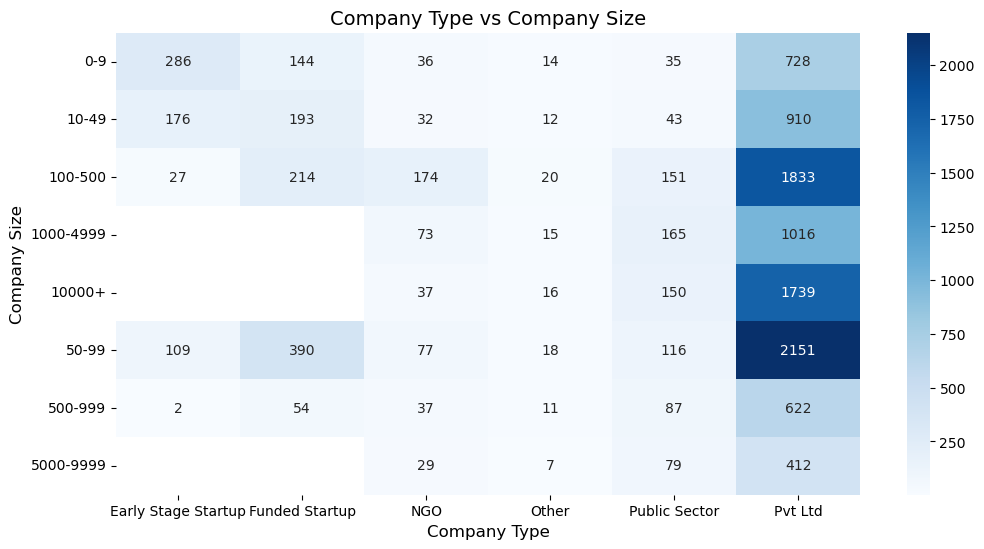

In [17]:

pivot_table = pd.pivot_table(df, index='company_size', columns='company_type', aggfunc=np.count_nonzero)['city']
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True,cmap="Blues", ax=ax,fmt='g',)

ax.set_title('Company Type vs Company Size', fontsize=14)
ax.set_xlabel('Company Type', fontsize=12)
ax.set_ylabel('Company Size', fontsize=12)

plt.show()


This heating graph shows better results to determine which company types corresponds the which company size. However, it does not give accurate values. For instance, "50-999"  company size is a part of pvt ltd with 2151 values, while 10000+ company size gives similar results. Hence, I will try to reduce number of categorical values of company size. 

In [18]:
df["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10-49        1471
1000-4999    1328
0-9          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [19]:
map={"0-9":"0-100","50-99":"0-100","10-49":"0-100","100-500":"100-1000","10000+":"1000+","1000-4999":"1000+",
     "500-999":"100-1000","5000-9999":"1000+"}
df["company_size"]=df["company_size"].map(map)
df["company_size"].value_counts()

0-100       5862
1000+       3910
100-1000    3448
Name: company_size, dtype: int64

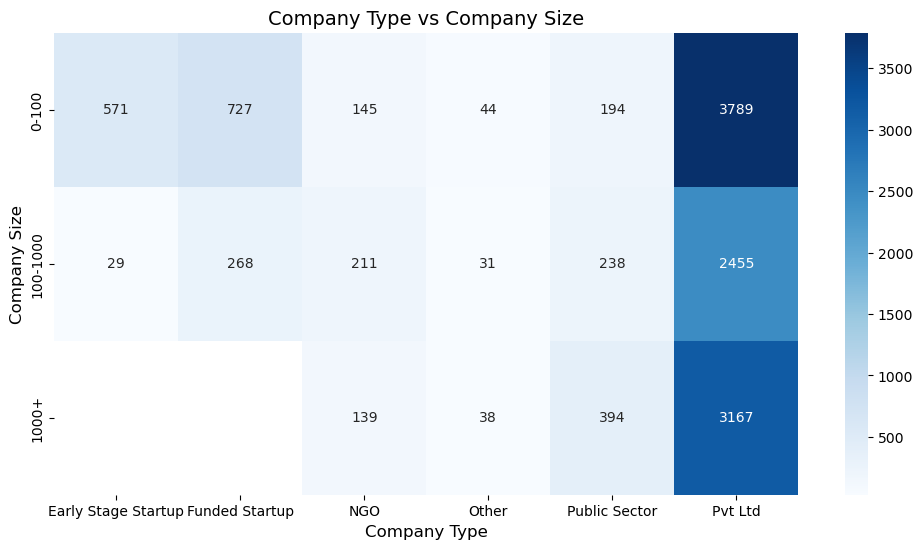

In [20]:

pivot_table = pd.pivot_table(df, index='company_size', columns='company_type', aggfunc=np.count_nonzero)['city']
fig, ax = plt.subplots(figsize=(12, 6))

sns.heatmap(pivot_table, annot=True,cmap="Blues", ax=ax,fmt='g',)

ax.set_title('Company Type vs Company Size', fontsize=14)
ax.set_xlabel('Company Type', fontsize=12)
ax.set_ylabel('Company Size', fontsize=12)

plt.show()


Now, Early Stage and Funded  Startup can usually be classified 0-100.Rest of them is equally distributed

In [21]:
df.loc[df["company_type"] == "Early Stage Startup"][["company_size"]].isna().any()


company_size    True
dtype: bool

In [22]:
df.loc[df["company_type"] == "Funded Startup"][["company_type"]].isna().any()


company_type    False
dtype: bool

In [23]:

df[df["company_type"]=="Early Stage Startup"]["company_size"].value_counts()


0-100       571
100-1000     29
Name: company_size, dtype: int64

In [24]:
df[df["company_type"]=="Early Stage Startup"]["company_size"].isna().sum()

3

In [25]:
df.loc[df["company_type"] == "Early Stage Startup", "company_size"]=df.loc[df["company_type"] == "Early Stage Startup", "company_size"].fillna('0-100')

In [26]:
df[df["company_type"]=="Early Stage Startup"]["company_size"].isna().sum()

0

In [27]:
df.loc[df["company_type"] == "Funded Startup", "company_size"]=df.loc[df["company_type"] == "Funded Startup", "company_size"].fillna('0-100')

In [28]:
df.loc[df["company_type"] == "Funded Startup"][["company_type"]].isna().any()


company_type    False
dtype: bool

In [29]:
null_sorted(df)


gender:22.00%
major_discipline:9.13%
company_type:5.65%
company_size:4.12%
last_new_job:1.67%
education_level:1.32%
enrolled_university:1.22%
experience:0.33%


In [30]:
import missingno as msno



<Axes: >

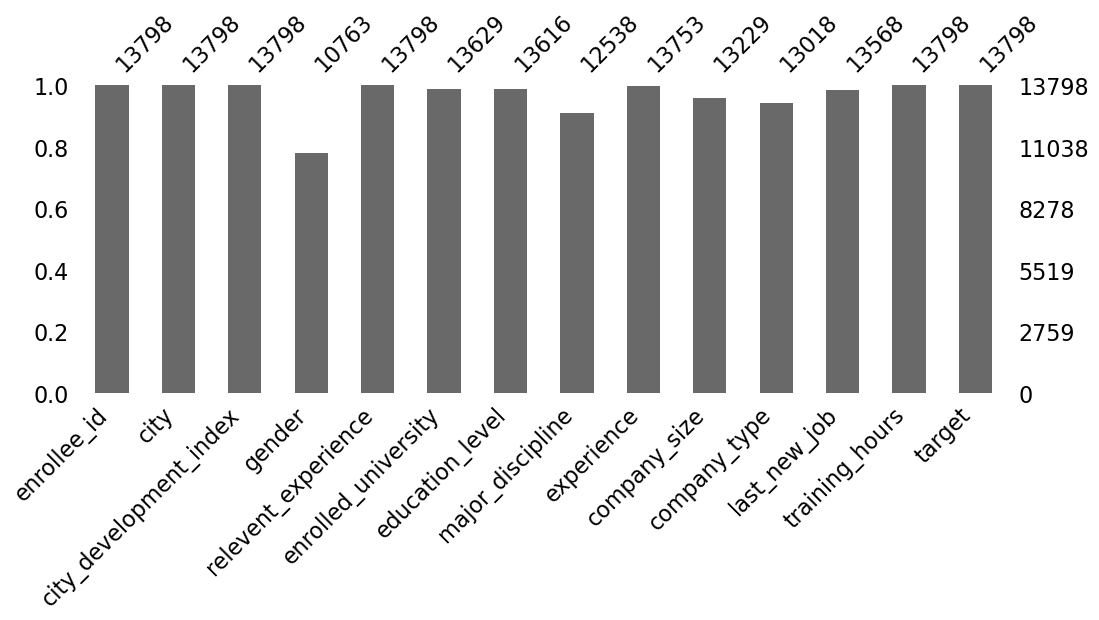

In [31]:
msno.bar(df,figsize=(12,4))

Gender has more nullity than others, so I will fill empty values thorugh machine learning.

In [32]:
df["gender"].value_counts()

Male      9693
Female     948
Other      122
Name: gender, dtype: int64

In [33]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,0-100,Pvt Ltd,>4,47,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,0-100,Funded Startup,4,8,0.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,0-100,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,0-100,Pvt Ltd,>4,18,1.0


In [34]:
df["experience"].value_counts()

>20    2422
5      1007
6       908
4       902
3       816
10      799
9       768
7       757
2       630
8       623
15      571
11      527
14      488
16      413
12      403
13      327
1       299
17      271
<1      253
19      242
18      219
20      108
Name: experience, dtype: int64

In [35]:
df_temporary=pd.get_dummies(df,columns=["relevent_experience","enrolled_university","education_level","major_discipline","company_size",
                        "company_size","company_type","last_new_job"])

In [36]:
df_temporary.head()

,enrollee_id,city,city_development_index,gender,experience,training_hours,target,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
1,29725,city_40,0.776,Male,15,47,0.0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,33241,city_115,0.789,NaN,<1,52,1.0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,666,city_162,0.767,Male,>20,8,0.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,28806,city_160,0.920,Male,5,24,0.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
7,402,city_46,0.762,Male,13,18,1.0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [37]:
df_temporary=df_temporary.drop(["enrollee_id","city","experience"],axis=1)

In [38]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [39]:
test_df=df_temporary[df_temporary["gender"].isnull()==True]
train_df=df_temporary[df_temporary["gender"].isnull()==False]
y=df_temporary["gender"]

In [40]:
train_df=train_df.drop(["gender"],axis=1)

In [1]:
print("nevzat")


nevzat
